In [1]:
'''
ATTRIBUTION: Proper attribution requires clear indication of the data source as "www.macrotrends.net".
A "dofollow" backlink to the originating page is also required if the data is displayed on a web page.
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
# RATE TERM: 0.5year, 1year, ..., 30year
spy_df = pd.read_csv('./MacroTrends_Data_Download_SPY.csv', parse_dates = True)
spy_df['Date'] = pd.to_datetime(spy_df['date'])
vix_df = pd.read_csv('./vix-volatility-index-historical-chart.csv', header = None, names = ['Date', '$VIX'])
vix_df['Date'] = pd.to_datetime(vix_df['Date'])

#print(spy_df)

scatter = pd.merge(spy_df, vix_df, how = 'inner', on = 'Date')

#print(scatter)

scatter = scatter.set_index(["Date"])
scatter = scatter.resample("M").mean(numeric_only = True) 
scatter.index = pd.to_datetime(scatter.index, format="%Y%m").to_period('M')

#print(scatter)

m_rates = scatter['open'].pct_change()[1:]
m_vix = scatter['$VIX'].pct_change()[1:]
corr_coef = np.corrcoef(m_rates, m_vix)[0][1]

(8429.0, 19286.0)

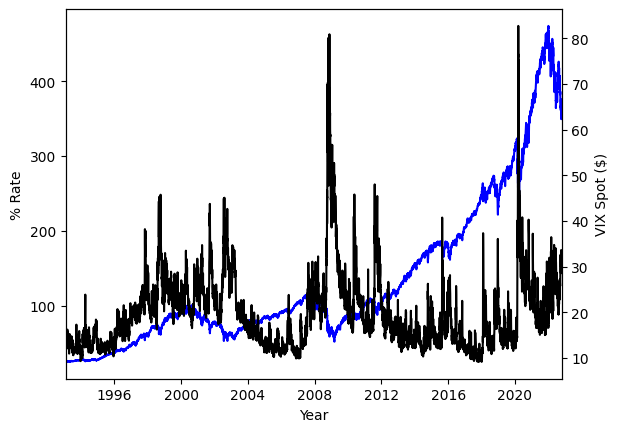

In [17]:
# PLOT LEFT: 30 YR RATE
# PLOT RIGHT: VIX spot price

fig, ax1 = plt.subplots()
ax1.plot(spy_df['Date'], spy_df['open'], color = "blue")
ax1.set_xlabel("Year")

ax1.set_ylabel("% Rate")

ax2 = ax1.twinx()
ax2.plot(vix_df['Date'], vix_df['$VIX'], color = "black")

ax2.set_ylabel("VIX Spot ($)")

ax1.set_xlim(max(min(spy_df['Date']), min(vix_df['Date'])), max(spy_df['Date']))

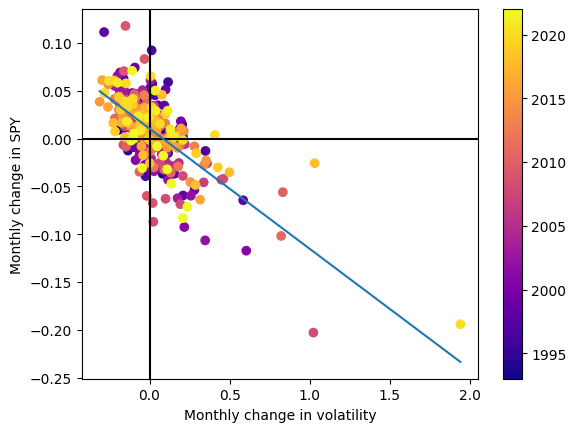

In [20]:
plt.scatter(m_vix, m_rates, c = scatter.index.year[1:], cmap = "plasma")
plt.colorbar()
plt.xlabel("Monthly change in volatility")
plt.ylabel("Monthly change in SPY")
plt.axvline(color="black")
plt.axhline(color="black")
plt.plot(np.unique(m_vix), np.poly1d(np.polyfit(m_vix, m_rates, 1))(np.unique(m_vix)))
plt.show()

In [19]:
corr_coef

-0.6948721889687245